In [131]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [132]:
#Importing Required Libraries for the Project
import numpy as np
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [133]:
#Loading the dataset
cardio_vascular_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/cardio_train.csv", delimiter=";")
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


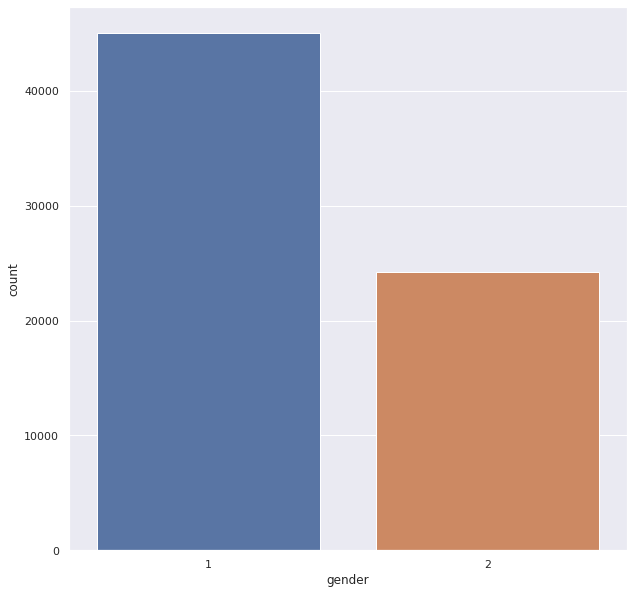

In [134]:
sns.countplot(cardio_vascular_data['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


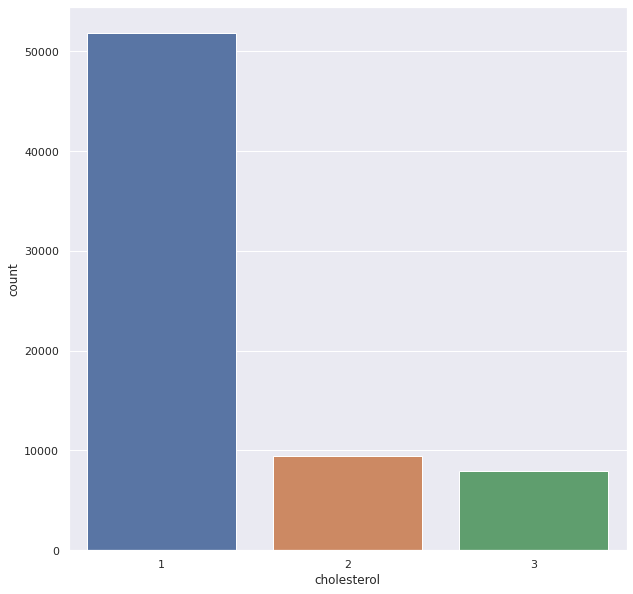

In [135]:
sns.countplot(cardio_vascular_data['cholesterol'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


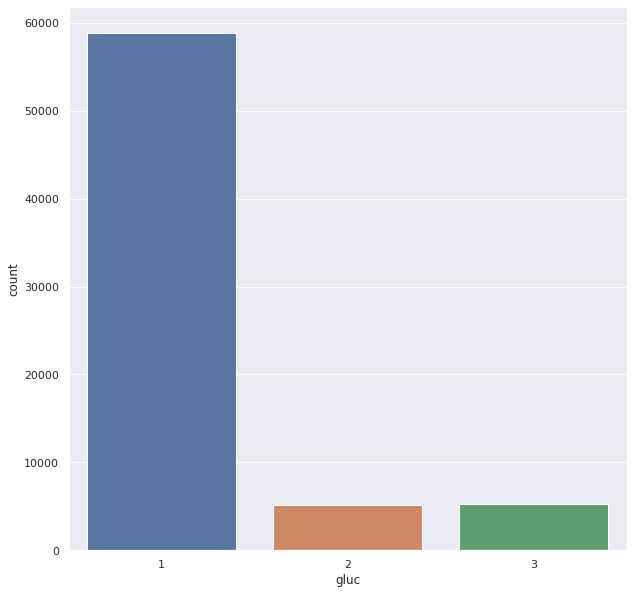

In [136]:
sns.countplot(cardio_vascular_data['gluc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


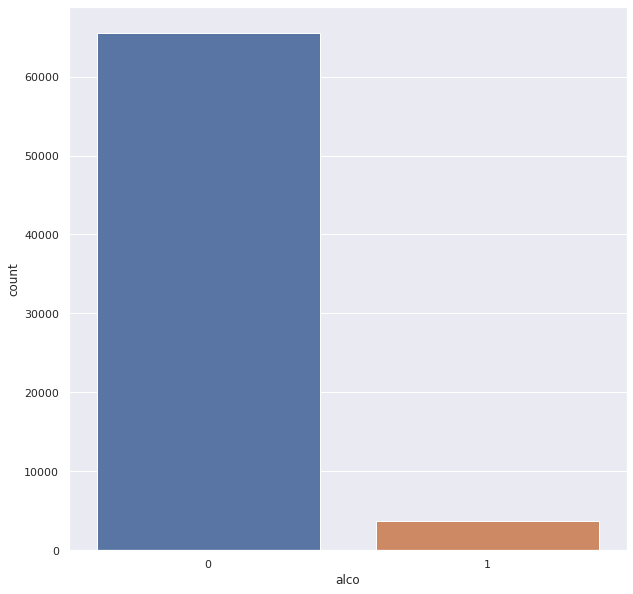

In [137]:
sns.countplot(cardio_vascular_data['alco'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


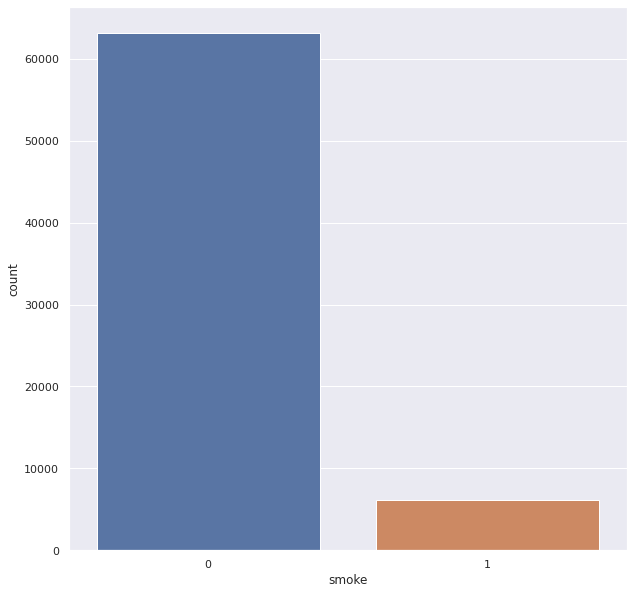

In [138]:
sns.countplot(cardio_vascular_data['smoke'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


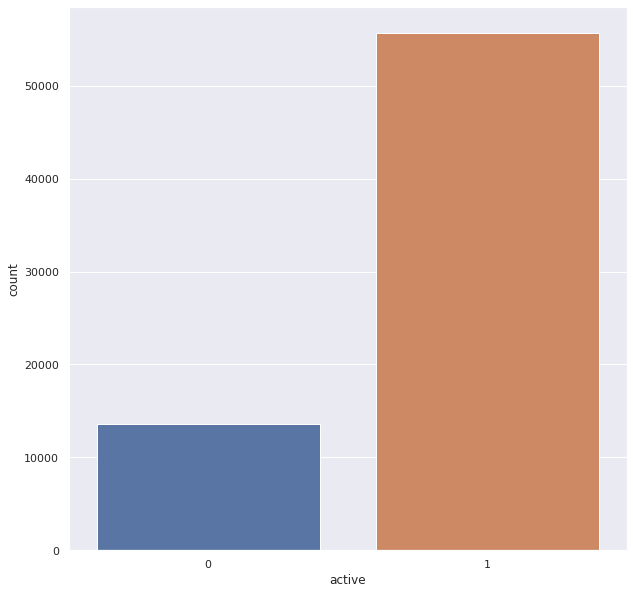

In [139]:
sns.countplot(cardio_vascular_data['active'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


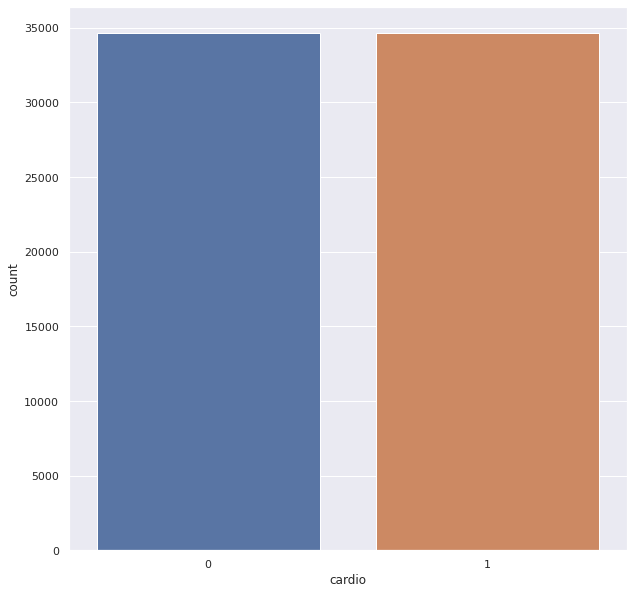

In [140]:
sns.countplot(cardio_vascular_data['cardio'])

# Data Preprocessing

In [141]:
#Checking the datatypes for all the attributes in the dataset
cardio_vascular_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [142]:
#Checking for null values in the dataset
cardio_vascular_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [143]:
#Checking for the starting and ending values to find out the outliers present in the dataset
cardio_vascular_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
#Age attribute is in the form of number of days. So, converting age to number of years.
cardio_vascular_data['age'] = cardio_vascular_data['age']/365.25

In [145]:
#Dropping the data entries where ap_hi and ap_lo are out of range.
cardio_vascular_data.drop(cardio_vascular_data.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [146]:
#Displaying the top 5 entries from the datatset to check if the data is preprocessed properly.
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.516769,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.104038,1,163,71.0,110,70,1,1,0,0,1,1
2,990,59.961670,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.832991,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.046543,1,155,62.0,120,80,1,1,0,0,1,0


# Correlation Matrix Plot 

### Correlation Matrix Visualization without Values 

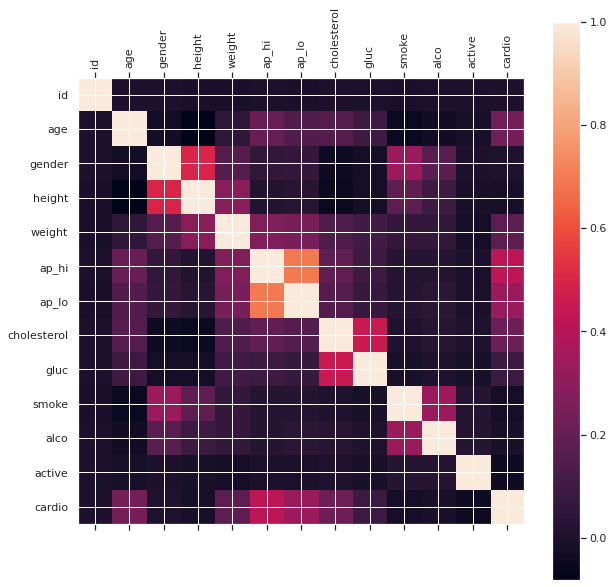

In [147]:
#Correlation matrix for finding out which attributes(features) are correlated.
rcParams['figure.figsize'] = 10,10
plt.matshow(cardio_vascular_data.corr())
plt.yticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns ,rotation='horizontal')
plt.xticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns, rotation='vertical')
plt.colorbar()

### Correlation Matrix Visualization with Values 

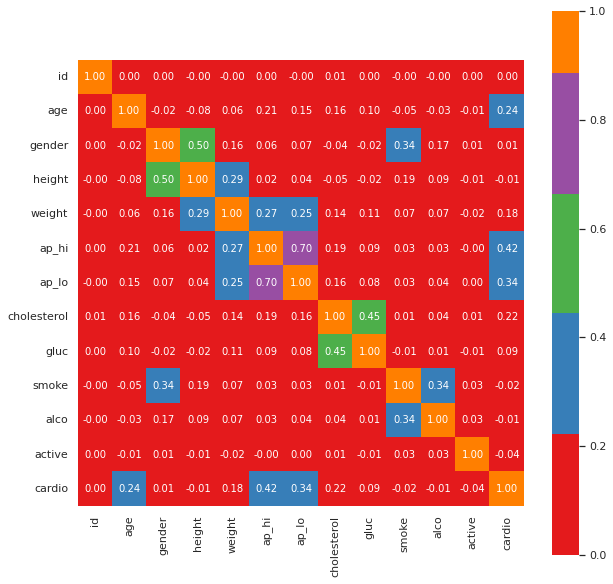

In [148]:
corrmat = cardio_vascular_data.corr()

plt.figure(figsize=(10,10))
sns.set()
hm = sns.heatmap(corrmat,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = cardio_vascular_data.columns, xticklabels = cardio_vascular_data.columns)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e79d50d0>,
      dtype=object)

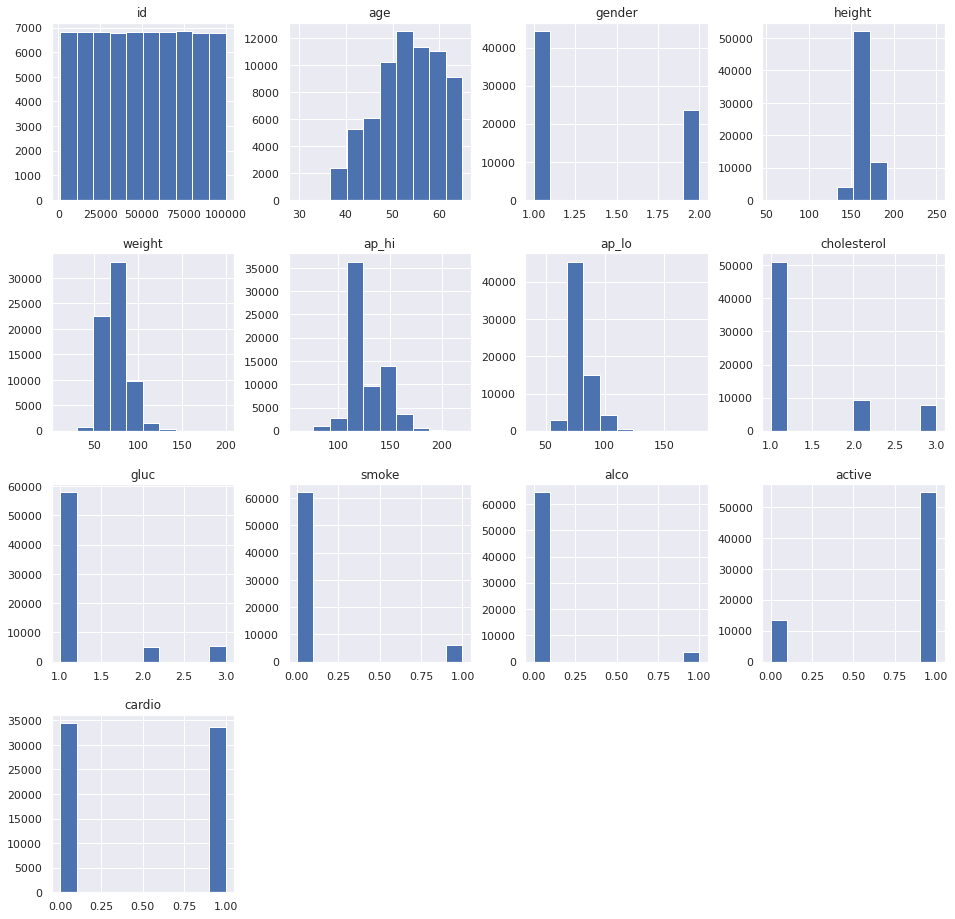

In [149]:
cardio_vascular_data.hist(figsize=(16,16))

In [150]:
#Dropping attribute "id" as it is not important for classifying the CVD 
#and setting X(input features) and y(target variable) for using the classification model on the data.
cardio_vascular_data.drop(['id'], axis=1)
X = cardio_vascular_data.drop(['cardio'], axis=1)
y = cardio_vascular_data['cardio']

# Applying Machine Learning Model to the Processed Data 

# 1. Random Forest Classifier 

In [156]:
#Splitting the dataset into training and testing dataset and using the Random Forest Model for the classification
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .66, random_state=0)
random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=0)
random_forest_model.fit(X_train, y_train)
y_pred_train_rfc = random_forest_model.predict(X_train)
y_pred_test_rfc = random_forest_model.predict(X_test)

cf_train_rfc = confusion_matrix(y_train, y_pred_train_rfc)
cf_test_rfc = confusion_matrix(y_test, y_pred_test_rfc)

precision_train_rfc = precision_score(y_train,y_pred_train_rfc)

recall_train_rfc = recall_score(y_test,y_pred_test_rfc)

f_measure_train_rfc = f1_score(y_test,y_pred_test_rfc)

precision_test_rfc = precision_score(y_test,y_pred_test_rfc)

recall_test_rfc = recall_score(y_test,y_pred_test_rfc)

f_measure_test_rfc = f1_score(y_test,y_pred_test_rfc)

print("Confusion Matrix for the Training Dataset")
print(cf_train_rfc)
print("\n\nConfusion Matrix for the Testing Dataset")
print(cf_test_rfc)

acc_train_rfc = accuracy_score(y_train, y_pred_train_rfc)
print("\n\nTraining Accuracy : ", acc_train_rfc)
acc_test_rfc = accuracy_score(y_test, y_pred_test_rfc)
print("Testing Accuracy : ", acc_test_rfc)

print("\nPrecision for random forest training: ",precision_train_rfc,"\nPrecision for random forest testing: ",precision_test_rfc)
print("\nRecall for random forest training: ",recall_train_rfc,"\nRecall for random forest testing: ",recall_test_rfc)
print("\nF-1 Score for random forest training: ",f_measure_train_rfc,"\nF-1 Score for random forest testing",f_measure_test_rfc)

Confusion Matrix for the Training Dataset
[[18258  4474]
 [ 7105 15093]]


Confusion Matrix for the Testing Dataset
[[9293 2369]
 [3823 7662]]


Training Accuracy :  0.742288003561095
Testing Accuracy :  0.7324923316196483

Precision for random forest training:  0.7713497214698216 
Precision for random forest testing:  0.7638321204266773

Recall for random forest training:  0.6671310404875925 
Recall for random forest testing:  0.6671310404875925

F-1 Score for random forest training:  0.7122141662018963 
F-1 Score for random forest testing 0.7122141662018963


In [153]:
#Splitting the dataset into training and testing dataset.
#Tried Random Forest Classifier model for different number of Decision Trees.

lst_acc_train_rfc = []
lst_y_pred_train_rfc = []
lst_acc_test_rfc = []
lst_y_pred_test_rfc = []
cnt = 0

no_of_decision_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .66)

for i in no_of_decision_trees:
  random_forest_model = RandomForestClassifier(n_estimators=i, max_depth=8, random_state=0)
  random_forest_model.fit(X_train, y_train)
  lst_y_pred_train_rfc.append(random_forest_model.predict(X_train))
  lst_y_pred_test_rfc.append(random_forest_model.predict(X_test))

  lst_acc_train_rfc.append(accuracy_score(y_train, lst_y_pred_train_rfc[cnt]))
  lst_acc_test_rfc.append(accuracy_score(y_test, lst_y_pred_test_rfc[cnt]))

  cnt += 1

In [154]:
#Printing Training and Testing Accuracies for different number of decision trees.

for i in range(0,20):
  print("\nTraining and Testing Accuracy for ", no_of_decision_trees[i]," Decision Trees: ")
  print("Training Accuracy: ", lst_acc_train_rfc[i])
  print("Testing Accuracy: ", lst_acc_test_rfc[i])


Training and Testing Accuracy for  10  Decision Trees: 
Training Accuracy:  0.7427776541286446
Testing Accuracy:  0.7278265001944096

Training and Testing Accuracy for  20  Decision Trees: 
Training Accuracy:  0.7438237257956821
Testing Accuracy:  0.7295113837646348

Training and Testing Accuracy for  30  Decision Trees: 
Training Accuracy:  0.7439795237035388
Testing Accuracy:  0.7299002030500713

Training and Testing Accuracy for  40  Decision Trees: 
Training Accuracy:  0.7434231026040508
Testing Accuracy:  0.729554585907461

Training and Testing Accuracy for  50  Decision Trees: 
Training Accuracy:  0.7426663699087469
Testing Accuracy:  0.7298137987644188

Training and Testing Accuracy for  60  Decision Trees: 
Training Accuracy:  0.7432895615401736
Testing Accuracy:  0.7292953730505033

Training and Testing Accuracy for  70  Decision Trees: 
Training Accuracy:  0.7432673046961941
Testing Accuracy:  0.7288633516222405

Training and Testing Accuracy for  80  Decision Trees: 
Traini

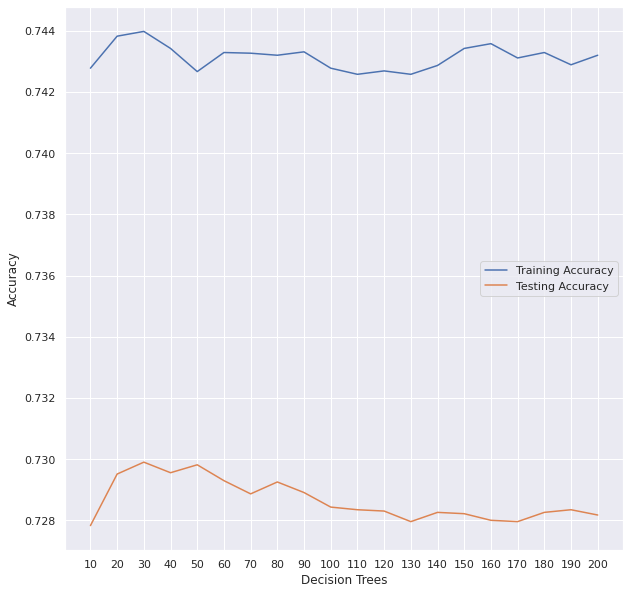

In [157]:
labels = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],labels)
plt.xlabel("Decision Trees")
plt.ylabel("Accuracy")
plt.plot(lst_acc_train_rfc,label='Training Accuracy')
plt.plot(lst_acc_test_rfc,label='Testing Accuracy')
plt.legend()

# 2. Logistic Regression

In [158]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

y_pred_train_lgr = pd.Series(logreg.predict(X_train))
y_pred_test_lgr = pd.Series(logreg.predict(X_test))

cf_train_lgr = confusion_matrix(y_train, y_pred_train_lgr)
cf_test_lgr = confusion_matrix(y_test, y_pred_test_lgr)

precision_train_lgr = precision_score(y_train,y_pred_train_lgr)

recall_train_lgr = recall_score(y_test,y_pred_test_lgr)

f_measure_train_lgr = f1_score(y_test,y_pred_test_lgr)

precision_test_lgr = precision_score(y_test,y_pred_test_lgr)

recall_test_lgr = recall_score(y_test,y_pred_test_lgr)

f_measure_test_lgr = f1_score(y_test,y_pred_test_lgr)

print("Confusion Matrix for the Training Dataset")
print(cf_train_rfc)
print("\n\nConfusion Matrix for the Testing Dataset")
print(cf_test_lgr)

acc_train_lgr = accuracy_score(y_train, y_pred_train_lgr)
print("\n\nTraining Accuracy: ", acc_train_lgr)
acc_test_lgr = accuracy_score(y_test, y_pred_test_lgr)
print("Testing Accuracy: ", acc_test_lgr)

print("\nPrecision for logestic regression training: ",precision_train_lgr,"\nPrecision for logestic regression testing: ",precision_test_lgr)
print("\nRecall for logestic regression training: ",recall_train_lgr,"\nRecall for logestic regression testing: ",recall_test_lgr)
print("\nF-1 Score for logestic regression training: ",f_measure_train_lgr,"\nF-1 Score for logestic regression testing",f_measure_test_lgr)

Confusion Matrix for the Training Dataset
[[18258  4474]
 [ 7105 15093]]


Confusion Matrix for the Testing Dataset
[[8997 2665]
 [4250 7235]]


Training Accuracy:  0.6997996884041843
Testing Accuracy:  0.7012571823562449

Precision for logestic regression training:  0.7252741568384027 
Precision for logestic regression testing:  0.7308080808080808

Recall for logestic regression training:  0.629952111449717 
Recall for logestic regression testing:  0.629952111449717

F-1 Score for logestic regression training:  0.6766425064297404 
F-1 Score for logestic regression testing 0.6766425064297404


# 3. K Nearest Neighbours

In [172]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)

y_pred_train_knn = knn_classifier.predict(X_train)
y_pred_test_knn = knn_classifier.predict(X_test)

cf_train_knn = confusion_matrix(y_train, y_pred_train_knn)
cf_test_knn = confusion_matrix(y_test, y_pred_test_knn)

precision_train_knn = precision_score(y_train,y_pred_train_knn)

recall_train_knn = recall_score(y_test,y_pred_test_knn)

f_measure_train_knn = f1_score(y_test,y_pred_test_knn)

precision_test_knn = precision_score(y_test,y_pred_test_knn)

recall_test_knn = recall_score(y_test,y_pred_test_knn)

f_measure_test_knn = f1_score(y_test,y_pred_test_knn)

print("Confusion Matrix for the Training Dataset")
print(cf_train_knn)
print("\n\nConfusion Matrix for the Testing Dataset")
print(cf_test_knn)

acc_train_knn = accuracy_score(y_train, y_pred_train_knn)
print("\n\nTraining Accuracy: ", acc_train_knn)
acc_test_knn = accuracy_score(y_test, y_pred_test_knn)
print("Testing Accuracy: ", acc_test_knn)

print("\nPrecision for knn training: ",precision_train_knn,"\nPrecision for knn testing: ",precision_test_knn)
print("\nRecall for knn training: ",recall_train_knn,"\nRecall for knn testing: ",recall_test_knn)
print("\nF-1 Score for knn training: ",f_measure_train_knn,"\nF-1 Score for knn testing",f_measure_test_knn)

Confusion Matrix for the Training Dataset
[[18964  3768]
 [ 4881 17317]]


Confusion Matrix for the Testing Dataset
[[7762 3900]
 [4810 6675]]


Training Accuracy:  0.8075005564210995
Testing Accuracy:  0.6237093359830648

Precision for knn training:  0.8212947593075646 
Precision for knn testing:  0.6312056737588653

Recall for knn training:  0.5811928602525033 
Recall for knn testing:  0.5811928602525033

F-1 Score for knn training:  0.6051677243880327 
F-1 Score for knn testing 0.6051677243880327


In [163]:
#Using kNN for classification for different values of k

k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lst_y_pred_train_knn = []
lst_y_pred_test_knn = []
lst_acc_train_knn = []
lst_acc_test_knn = []
cnt = 0

for i in k:
  classifier = KNeighborsClassifier(n_neighbors = i, =0)
  classifier.fit(X_train, y_train)

  lst_y_pred_train_knn.append(classifier.predict(X_train))
  lst_y_pred_test_knn.append(classifier.predict(X_test))

  lst_acc_train_knn.append(accuracy_score(y_train, lst_y_pred_train_knn[cnt]))
  lst_acc_test_knn.append(accuracy_score(y_test, lst_y_pred_test_knn[cnt]))
  
  cnt += 1

In [101]:
#Printing Testing and Training Accuracies for different values of k.

for i in k:
  print("\nTraining and Testing Accuracy for k =", i)
  print("Training Accuracy: ", lst_acc_train_knn[i-2])
  print("Testing Accuracy: ", lst_acc_test_knn[i-2])


Training and Testing Accuracy for k = 2
Training Accuracy:  0.7954818606721566
Testing Accuracy:  0.6019786581414438

Training and Testing Accuracy for k = 3
Training Accuracy:  0.8080792343645671
Testing Accuracy:  0.6279431459800406

Training and Testing Accuracy for k = 4
Training Accuracy:  0.7537947918985088
Testing Accuracy:  0.622974899555018

Training and Testing Accuracy for k = 5
Training Accuracy:  0.7636545737814378
Testing Accuracy:  0.6316153281202748

Training and Testing Accuracy for k = 6
Training Accuracy:  0.7345648787002003
Testing Accuracy:  0.626474273123947

Training and Testing Accuracy for k = 7
Training Accuracy:  0.7432005341642555
Testing Accuracy:  0.6339050416900678

Training and Testing Accuracy for k = 8
Training Accuracy:  0.722991319830848
Testing Accuracy:  0.6289799974078715

Training and Testing Accuracy for k = 9
Training Accuracy:  0.7310705541954151
Testing Accuracy:  0.632868190262237

Training and Testing Accuracy for k = 10
Training Accuracy:

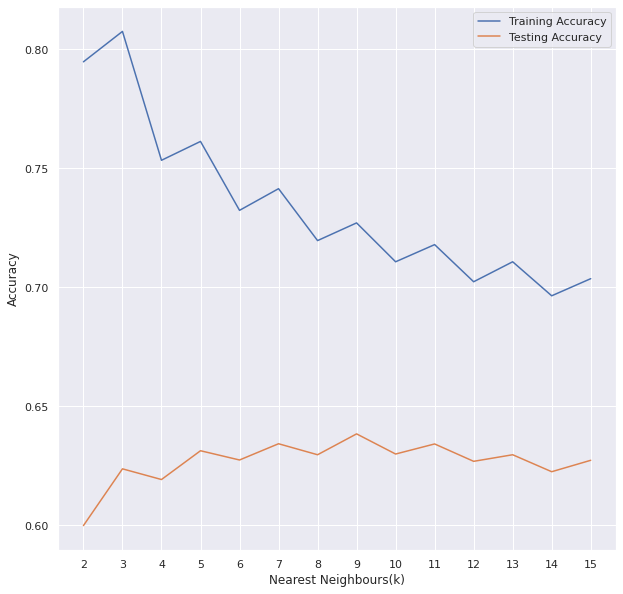

In [164]:
#Plotting Testing and Training Accuracies for different values of k.

labels = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels)
plt.xlabel("Nearest Neighbours(k)")
plt.ylabel("Accuracy")
plt.plot(lst_acc_train_knn,label='Training Accuracy')
plt.plot(lst_acc_test_knn,label='Testing Accuracy')
plt.legend()

# 4. Support Vector Classifier (LinearSVC)

In [166]:
support_vector_classifier = svm.LinearSVC(dual=False, random_state=0) 
support_vector_classifier.fit(X_train,y_train)

y_pred_train_svc = support_vector_classifier.predict(X_train) 
y_pred_test_svc = support_vector_classifier.predict(X_test)

cf_train_svc = confusion_matrix(y_train, y_pred_train_svc)
cf_test_svc = confusion_matrix(y_test, y_pred_test_svc)

precision_train_svc = precision_score(y_train,y_pred_train_svc)

recall_train_svc = recall_score(y_test,y_pred_test_svc)

f_measure_train_svc = f1_score(y_test,y_pred_test_svc)

precision_test_svc = precision_score(y_test,y_pred_test_svc)

recall_test_svc = recall_score(y_test,y_pred_test_svc)

f_measure_test_svc = f1_score(y_test,y_pred_test_svc)

print("Confusion Matrix for the Training Dataset") 
print(cf_train_svc) 
print("\n\nConfusion Matrix for the Testing Dataset") 
print(cf_test_svc)

acc_train_svc = accuracy_score(y_train, y_pred_train_svc) 
print("\n\nTraining Accuracy: ", acc_train_svc) 
acc_test_svc = accuracy_score(y_test, y_pred_test_svc) 
print("Testing Accuracy: ", acc_test_svc)

print("\nPrecision for svc training: ",precision_train_svc,"\nPrecision for svc testing: ",precision_test_svc)
print("\nRecall for svc training: ",recall_train_svc,"\nRecall for svc testing: ",recall_test_svc)
print("\nF-1 Score for svc training: ",f_measure_train_svc,"\nF-1 Score for svc testing",f_measure_test_svc)

Confusion Matrix for the Training Dataset
[[17476  5256]
 [ 7660 14538]]


Confusion Matrix for the Testing Dataset
[[9059 2603]
 [3970 7515]]


Training Accuracy:  0.7125306031604719
Testing Accuracy:  0.7160323152028341

Precision for svc training:  0.7344649893907245 
Precision for svc testing:  0.7427357185214469

Recall for svc training:  0.6543317370483239 
Recall for svc testing:  0.6543317370483239

F-1 Score for svc training:  0.6957367032356617 
F-1 Score for svc testing 0.6957367032356617


# 5. XG-Boost Classifier (eXtreme Gradient Boosting)

In [173]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb_classifier.fit(X_train,y_train)

y_pred_train_xgb = xgb_classifier.predict(X_train) 
y_pred_test_xgb = xgb_classifier.predict(X_test)

cf_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
cf_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

precision_train_xgb = precision_score(y_train,y_pred_train_xgb)

recall_train_xgb = recall_score(y_test,y_pred_test_xgb)

f_measure_train_xgb = f1_score(y_test,y_pred_test_xgb)

precision_test_xgb = precision_score(y_test,y_pred_test_xgb)

recall_test_xgb = recall_score(y_test,y_pred_test_xgb)

f_measure_test_xgb = f1_score(y_test,y_pred_test_xgb)

print("Confusion Matrix for the Training Dataset") 
print(cf_train_xgb) 
print("\n\nConfusion Matrix for the Testing Dataset") 
print(cf_test_xgb)

acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb) 
print("\n\nTraining Accuracy: ", acc_train_xgb) 
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb) 
print("Testing Accuracy: ", acc_test_xgb)

print("\nPrecision for xgb training: ",precision_train_xgb,"\nPrecision for xgb testing: ",precision_test_xgb)
print("\nRecall for xgb training: ",recall_train_xgb,"\nRecall for xgb testing: ",recall_test_xgb)
print("\nF-1 Score for xgb training: ",f_measure_train_xgb,"\nF-1 Score for xgb testing",f_measure_test_xgb)

Confusion Matrix for the Training Dataset
[[17825  4907]
 [ 6869 15329]]


Confusion Matrix for the Testing Dataset
[[9152 2510]
 [3602 7883]]


Training Accuracy:  0.7379034052971288
Testing Accuracy:  0.7359485030457511

Precision for xgb training:  0.7575113658825855 
Precision for xgb testing:  0.7584912922159146

Recall for xgb training:  0.6863735306922072 
Recall for xgb testing:  0.6863735306922072

F-1 Score for xgb training:  0.7206325989578571 
F-1 Score for xgb testing 0.7206325989578571


In [104]:
#Decision tree

In [189]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=0)
decision_tree_classifier.fit(X_train, y_train)

y_pred_train_dtc = decision_tree_classifier.predict(X_train)
y_pred_test_dtc = decision_tree_classifier.predict(X_test)

cf_train_dtc = confusion_matrix(y_train, y_pred_train_dtc)
cf_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)

precision_train_dtc = precision_score(y_train,y_pred_train_dtc)

recall_train_dtc = recall_score(y_test,y_pred_test_dtc)

f_measure_train_dtc = f1_score(y_test,y_pred_test_dtc)

precision_test_dtc = precision_score(y_test,y_pred_test_dtc)

recall_test_dtc = recall_score(y_test,y_pred_test_dtc)

f_measure_test_dtc = f1_score(y_test,y_pred_test_dtc)

print("Confusion Matrix for the Training Dataset") 
print(cf_train_dtc) 
print("\n\nConfusion Matrix for the Testing Dataset") 
print(cf_test_dtc)

acc_train_dtc = accuracy_score(y_train, y_pred_train_dtc) 
print("\n\nTraining Accuracy: ", acc_train_dtc) 
acc_test_dtc = accuracy_score(y_test, y_pred_test_dtc) 
print("Testing Accuracy: ", acc_test_dtc)

print("\nPrecision for decision tree training: ",precision_train_dtc,"\nPrecision for decision tree testing: ",precision_test_dtc)
print("\nRecall for decision tree training: ",recall_train_dtc,"\nRecall for decision tree testing: ",recall_test_dtc)
print("\nF-1 Score for decision tree training: ",f_measure_train_dtc,"\nF-1 Score for decision tree testing",f_measure_test_dtc)

Confusion Matrix for the Training Dataset
[[18333  4399]
 [ 8481 13717]]


Confusion Matrix for the Testing Dataset
[[9419 2243]
 [4440 7045]]


Training Accuracy:  0.7133318495437347
Testing Accuracy:  0.7112800794919428

Precision for decision tree training:  0.7571759770368734 
Precision for decision tree testing:  0.7585055986218777

Recall for decision tree training:  0.6134087940792338 
Recall for decision tree testing:  0.6134087940792338

F-1 Score for decision tree training:  0.6782843113657151 
F-1 Score for decision tree testing 0.6782843113657151


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

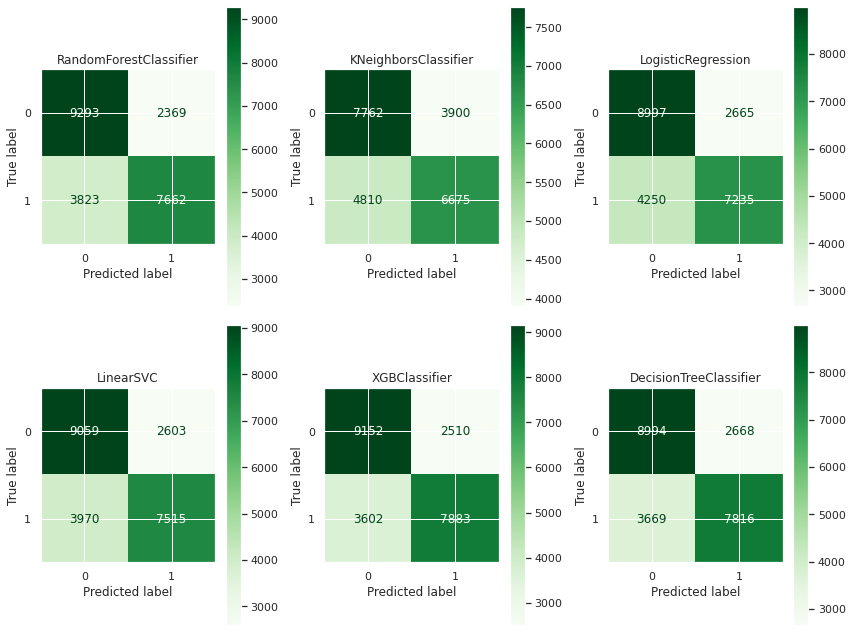

In [177]:
classifiers = [random_forest_model, knn_classifier, logreg, support_vector_classifier, xgb_classifier, decision_tree_classifier]
fig1, axes1 = plt.subplots(nrows=2, ncols=3, figsize=(12,9))

for clf, axis in zip(classifiers, axes1.flatten()):
    plot_confusion_matrix(clf, 
                          X_test, 
                          y_test, 
                          ax=axis, 
                          cmap='Greens',
                         display_labels=cardio_vascular_data.cardio)
    axis.title.set_text(type(clf).__name__)
plt.tight_layout()  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

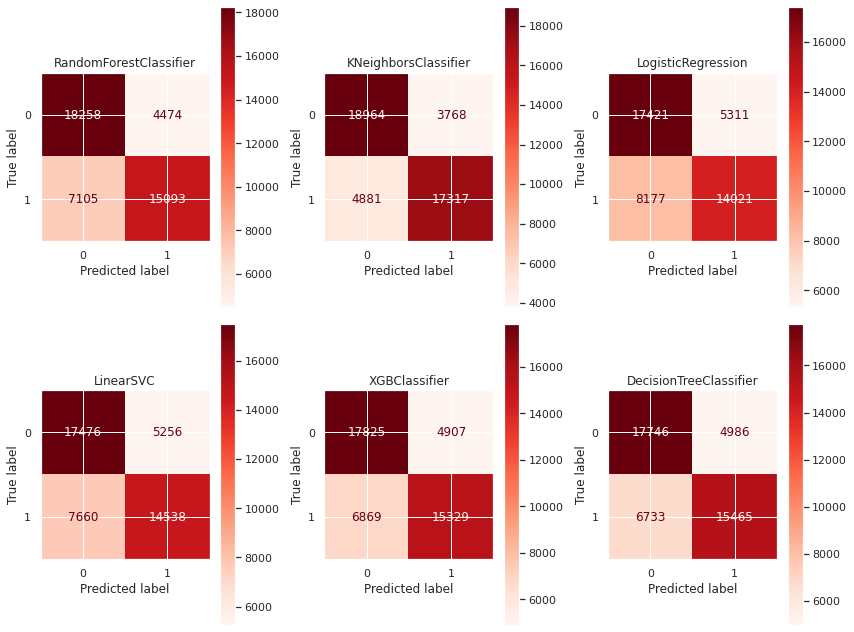

In [178]:
fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(12,9))

for clf, axis in zip(classifiers, axes2.flatten()):
    plot_confusion_matrix(clf, 
                          X_train, 
                          y_train, 
                          ax=axis, 
                          cmap='Reds',
                         display_labels=cardio_vascular_data.cardio)
    axis.title.set_text(type(clf).__name__)
plt.tight_layout()  
plt.show()